# Aula #28 – Clustering

# Aprendizado supervisionado vs não supervisionado

![](figures/tipoAprendizado.png)

# Clustering

- Técnica para agrupar um conjunto de elementos tal que objetos agrupados em um mesmo grupo (também chamado de **cluster**) sejam mais similares entre eles do que com outros objetos pertencentes a outros clusters.
- Por ser uma técnica de aprendizado não supervisionado, as classes desses objetos são desconhecidas e os agrupamentos são realizados apenas com base em suas características.

### Para que fazer agrupamentos?

- Encontrar padrões
- Análises exploratórias
- Reduzir dimensionalidade

### Tipos de clustering

- **Por partição**
- **Hierárquico**
- **Por densidade**

## K-means

- Algoritmo de particionamento que tem como objetivo agrupar os objetos em K clusters.
- Para isso, são elegidos representantes desses clusters, chamados de **centroides**.

<tr>
    <td> <img src="figures/fluxogramaKmeans.png" style="width: 850px;" /> </td>
    <td> <img src="https://media.giphy.com/media/VryvUKuOxNLqM/giphy.gif" /> </td>
</tr>

### Como calcular essa distância?

![](figures/distancia.png)

#### Vamos praticar agora? :D

![](https://media.giphy.com/media/AuwBPJztsEWkw/giphy.gif)

### Exercício 1 - segmentação de clientes

Vamos utilizar uma base fictícia contendo dados de visitas de clientes em um site:  
- **Visitas**: quantidade de visitas realizadas durante o mês
- **Tempo**: tempo, em segundos, que os usuários ficaram no site

In [1]:
# imports necessários para a aula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (12, 7)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importar o dataset
df = pd.read_csv("data/case.csv")

In [5]:
df.head()

,visitas,tempo
0,3,2
1,16,18
2,7,1
3,14,11
4,3,24


In [6]:
df.describe()

,visitas,tempo
count,3000.000000,3000.000000
mean,30.221000,41.165333
std,24.852097,24.983863
min,0.000000,0.000000
25%,9.000000,19.000000
50%,19.000000,42.000000
75%,56.000000,62.000000
max,87.000000,104.000000


**Vamos visualizar a distribuição desses dados?**

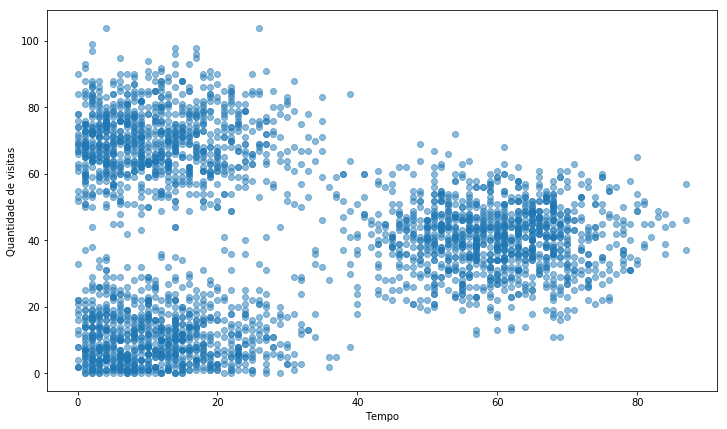

In [7]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

### **IMPORTANTE**

Como os agrupamentos são definidos com base em uma medida de distância, primeiro **precisamos normalizar os dados**!

In [8]:
# TODO
# Importar o StandardScaler e normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['visitas','tempo']] = scaler.fit_transform(df)

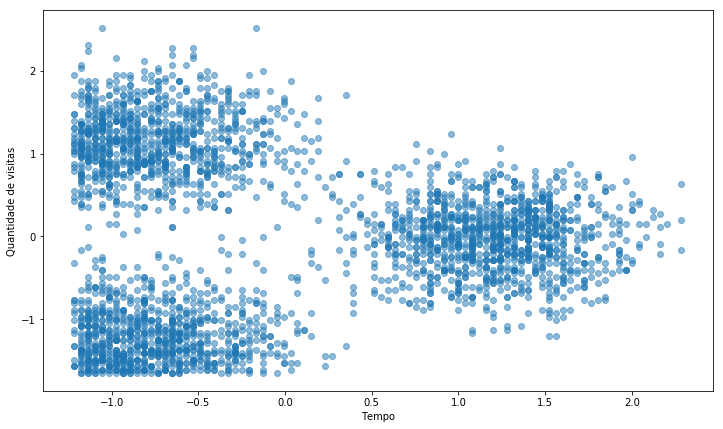

In [9]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

**Voltando ao K-means...**

O Sklearn já conta com uma implementação do [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Podemos importá-la:

In [10]:
# TODO
# Importar o K-means
from sklearn.cluster import KMeans

In [11]:
# cria uma instância do K-means
kmeans = KMeans() 
kmeans.fit(df)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

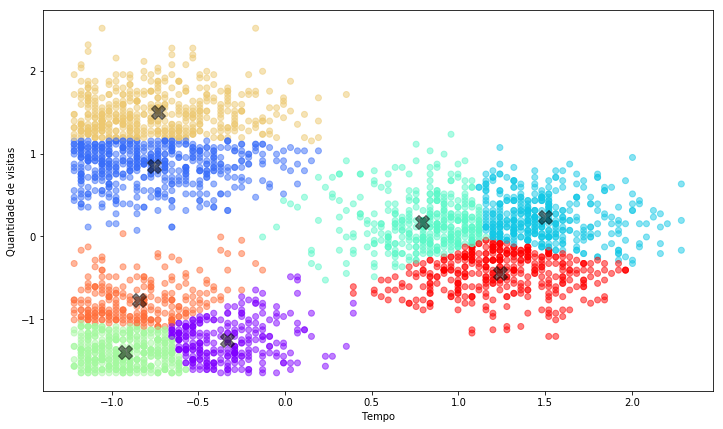

In [12]:
# plota os dados identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

**Acham que 8 clusters fazem sentido nesse caso? Podemos mudar o número de clusters!**

### **IMPORTANTE²**

Além de definir o número de clusters, também é **importante escolher uma seed**. Isso porque como os centroides iniciais são escolhidos aleatoriamente, clusters diferentes podem ser gerados pelo K-means dependendo dessa iniciação e do número de clusters.

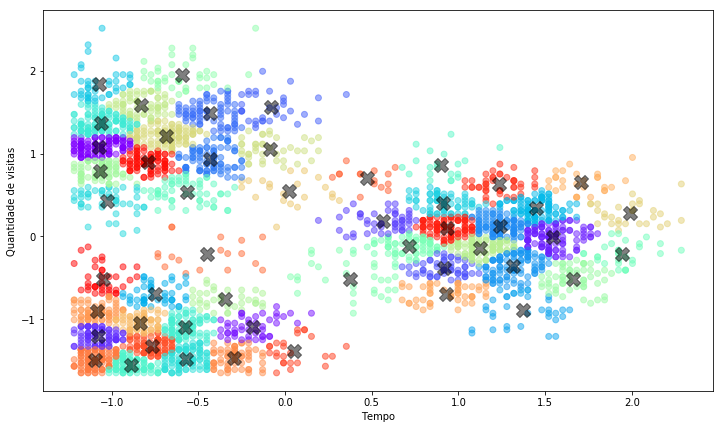

In [13]:
# Sem o seed
kmeans = KMeans(n_clusters=50) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

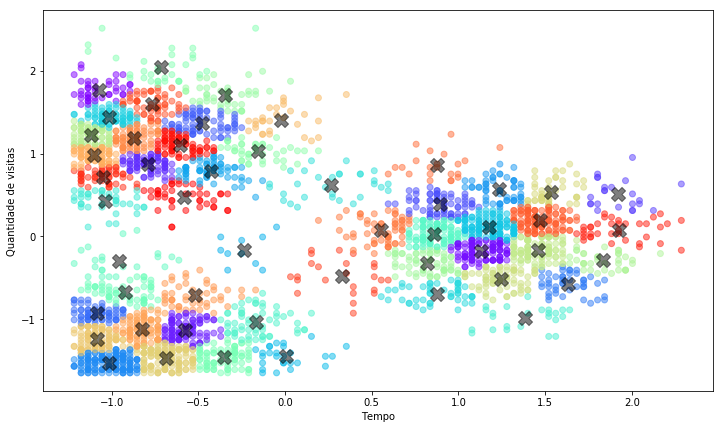

In [14]:
# Com o seed
kmeans = KMeans(n_clusters=50, random_state=8) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Altere o número de clusters e rode o algoritmo de novo. Vamos ver o que acontece :D

Não se esqueça de adicionar uma seed!

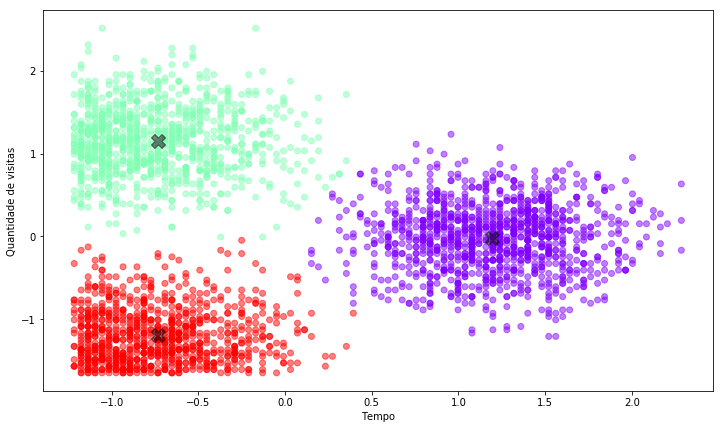

In [15]:
# TODO
kmeans = KMeans(n_clusters=3, random_state=1) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

**Agora fez mais sentido a quantidade de clusters? E no caso do dataset abaixo? Quantos clusters seriam?**

![](https://media.giphy.com/media/hgCM9JNzlqAr6/giphy.gif)

### Como escolher o número de clusters?

![](https://media1.tenor.com/images/aa9c780acd020eaa5b11322b869f67fa/tenor.gif?itemid=5794186)

## Avaliação dos clusters

Como os dados não são rotulados, não podemos usar métricas de avaliação utilizadas em problemas de classificação como uma matriz de confusão, por exemplo.

Para problemas de agrupamento, existem diversas métricas possíveis para avaliar o quão bons foram os agrupamentos encontrados. Hoje falaremos sobre uma delas: o *Elbow method*.

**Elbow method ("método do cotovelo")**

Esse método nos fornece uma ideia de qual seria um bom número de clusters baseando-se na inércia entre os objetos e os centroides dos seus respectivos clusters. 

*Mas o que é essa "inércia"?*

A **inércia** é uma medida calculada ao rodarmos o K-means e ela se baseia na soma das distâncias quadráticas de cada objeto para os centroides de seus respectivos clusters. Portanto, quanto maior for a inércia, maior será a dispersão dos clusters; quanto menor, mais os clusters estarão compactados.

\begin{equation*}
Inércia (k) = \sum_{j=1}^{k}{\sum_{x_i \in cluster j}{||x_i - \bar{x_j}||^2}},
\quad \text{onde } \bar{x_j} \text{ é o centroide do cluster j}.
\end{equation*}

![](figures/inercia.png)

Para escolhermos o número de clusters, observamos o gráfico do cotovelo com as inércias e escolhemos o ponto no qual a inércia começa a ficar mais plano e formar um "cotovelo":

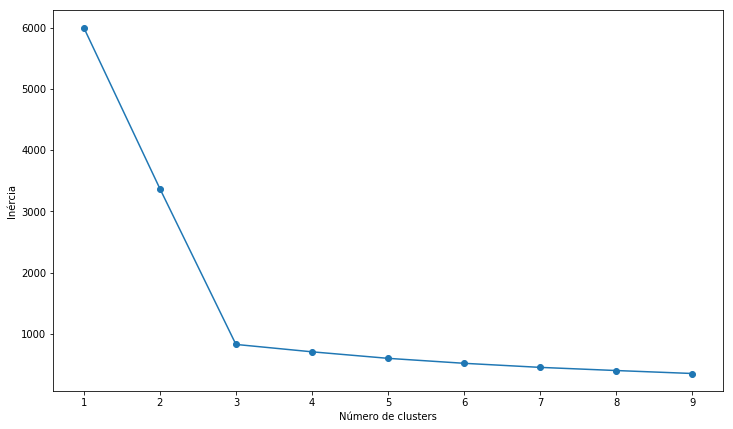

In [16]:
# Quantidade de clusters que serão testados
k = list(range(1, 10))

# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Há diversos outros métodos de avaliação, alguns deles estão presentes no [sklearn](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation):

**Índices externos**

Compara a estrutura de clusters descobertos com uma estrutura de grupos previamente conhecida.
- índice de Rand
- índice de Jaccard
- índice de Folkes e Mallows


**Índices internos**

Analisa a estrutura de clusters descobertos com relação a algum critério, como compacidade e separabilidade.
- índice Dunn
- índice Davies-Bouldin
- índice Silhouette


*Apesar desses métodos fornecerem indícios do número de clusters ideal, também é importante ter um bom conhecimento sobre o domínio (ou envolver pessoas que o tenham no projeto!).*

### Exercício 2 - compressão de cores de imagens

Vamos fazer agora fazer mais um case com o K-Means, mas agora com imagens :D

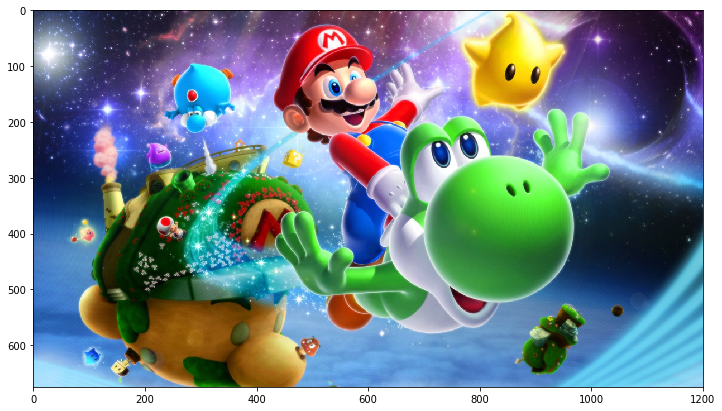

In [17]:
# Importar a imagem
img = plt.imread("data/mario.jpg")
plt.imshow(img)
plt.show()

In [18]:
# dimensão da imagem
img.shape

(675, 1200, 3)

In [19]:
# redimensionar a imagem para termos somente duas dimensões de dados
x, y, z = img.shape
img_2d = img.reshape(x*y, z)
img_2d.shape

(810000, 3)

|   Pixel    | R   | G   | B   |
|---------|-----|-----|-----|
| Pixel 1 | 255 | 0   | 0   | 
| Pixel 2 | 255 | 102 | 102 | 
| Pixel 3 | 0   | 0   | 0   |  

In [20]:
# TODO
# Escolha um número de clusters e use o K-means para realizar os agrupamentos
kmeans_img = KMeans(n_clusters=15)
kmeans_img.fit(img_2d)

cluster_centers = kmeans_img.cluster_centers_
cluster_labels = kmeans_img.labels_

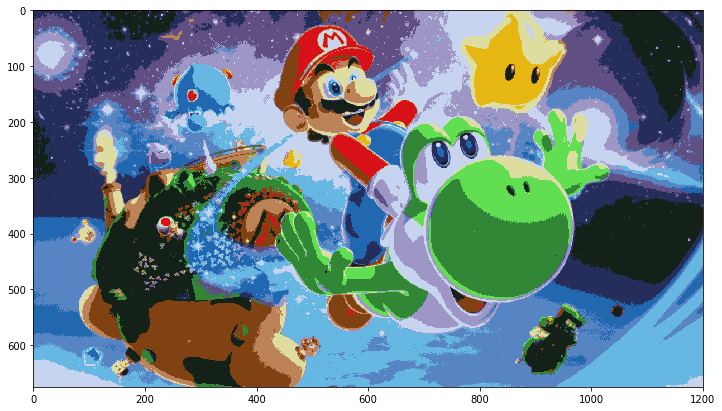

In [21]:
# Plotar a imagem após a compressão
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z).astype(int))
plt.show()

### Vantagens do K-means
- Simples de entender e de ser implementado
- Eficiente
- Escalável

### Desvantagens do K-means
- Necessidade de escolher um número de clusters
- Pode sofrer com outliers
- Assume formatos esféricos para os clusters
- Funciona apenas para dados numéricos.

**O que podemos fazer para lidar com variáveis categóricas então?**
- Feature engineering (One-hot enconding, por exemplo)
- Utilizar outro algoritmo que permita usar esse tipo de variável

## Hierarquical clustering

Os clusters são representados hierarquicamente por meio de diagrama representando uma árvore, chamado de *dendrograma*.

**Tipos**:
- **Aglomerativos**
- **Divisivos**

## Agrupamento hierárquico aglomerativo

<tr>
    <td> <img src="figures/fluxogramaHierarquico.png"  /> </td>
    <td> <img src="https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif" style="width: 700px;"/> </td>
</tr>

**Quais são os critérios para agrupar os objetos?**


### Uma métrica de distância
- Distância euclidiana
- Distância Manhattan
- [Outras métricas aceitas](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)

### Um método de agrupamento
- Single linkage
- Complete linkage
- Average linkage
- Centroid linkage
- [Outras abordagens aceitas](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)


![](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-319-07212-8_10/MediaObjects/318405_1_En_10_Fig2_HTML.gif)

### Exercício 3 - segmentação de clientes (de novo!)

Vamos utilizar o mesmo conjunto de dados utilizado no exercício do K-means para realizar um agrupamento hierárquico aglomerativo. Para esse agrupamento, precisaremos importar o dendograma do [Scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

O sklearn também possui um [módulo](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) para realizar um agrupamento hierárquico aglomerativo, mas é complicado visualizar o dendograma com ele, então vamos ficar com o scipy mesmo.

In [22]:
# TODO
# importar os módulos dendogram e linkage
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
h_cluster = linkage(df, method='complete', metric='euclidean')

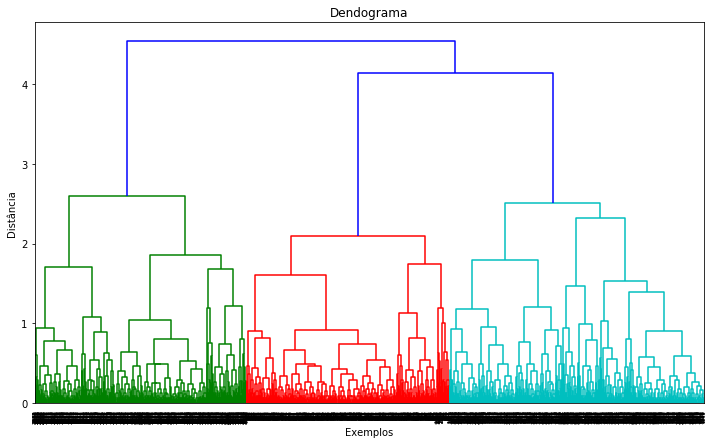

In [24]:
plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
dendrogram(h_cluster)
plt.show()

**Vamos testar outras abordagens de agrupamentos e métricas de distância?**

![](https://media.giphy.com/media/12zV7u6Bh0vHpu/giphy.gif)

**E como podemos escolher o número de clusters?**

Podemos visualizar o dendograma e observar onde há a maior distância entre os grupos formados.

### Exemplo de aplicação real 

Agrupamentos hierárquicos são muito utilizados na área de bioinformática para construção de árvores filogenéticas:

![filogenia](https://www.science20.com/files/Tree_1A.jpg)

Para a [pesquisa](http://www.teses.usp.br/teses/disponiveis/100/100131/tde-28052017-221803/pt-br.php) abaixo, foi feito um agrupamento hierárquico aglomerativo para se obter uma árvore filogenética de bactérias do gênero *Xanthomonas* com base em suas famílias de genes. 

Para calcular a distância entre essas bactérias, foi utilizada a distância euclidiana e o método de agrupamento foi o complete linkage.

![mestrado](figures/mestrado.png)

### Vantagens do agrupamento hierárquico
- Não precisamos escolher um número inicial de clusters
- Dendrogramas são ótimos para visualização dos clusters
- Gera uma hierarquia entre os clusters

### Desvantagens do agrupamento hierárquico
- Complexidade
- Dependendo dos dados, pode ser difícil escolher o número de clusters
- Um agrupamento feito erroneamente não pode ser desfeito

## DBSCAN

O DBSCAN é um método de clustering por densidade que busca por clusters definidos como regiões com alta densidade de objetos, separados por regiões de baixa densidade. 

Ele necessida dos seguintes parâmetros:

- **ɛ** : raio da vizinhança ao redor do ponto P
- **minPts**: número mínimo de pontos na vizinhança para que seja definido um cluster

Com base nesses dois parâmetros, o DBSCAN categoria os pontos em três categorias:
- **Core Points**: um ponto P é um core point se sua vizinhança contém ao menos minPts
- **Border Points**: um ponto Q é um border point se sua vizinhança contem menos pontos que minPts, mas se Q é alcancável por algum core point P.
- **Outlier**: um ponto O é um outlier se não for nem um core point e nem um border point

<tr>
    <td> <img src="figures/fluxogramaDBSCAN.png"  /> </td>
    <td> <img src="https://media.giphy.com/media/lCL2GQewp7fkk/giphy.gif" style="width: 600px;"/> </td>
</tr>

**Outro gif ilustrando o DBSCAN:**

![](https://cdn-images-1.medium.com/max/800/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

### Exercício 4 - segmentação de clientes (de novo!²)

Vamos utilizar novamente o conjunto do primeiro exercício com o DBSCAN, que vamos importar do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

In [25]:
# TODO
# Importar o DBSCAN
from sklearn.cluster import DBSCAN

In [26]:
# TODO
# Escolha um epsilon e um minPts
dbscan = DBSCAN(eps = .1, min_samples = 8)
# salvar os clusters atribuídos para cada exemplo
clusters = dbscan.fit_predict(df)

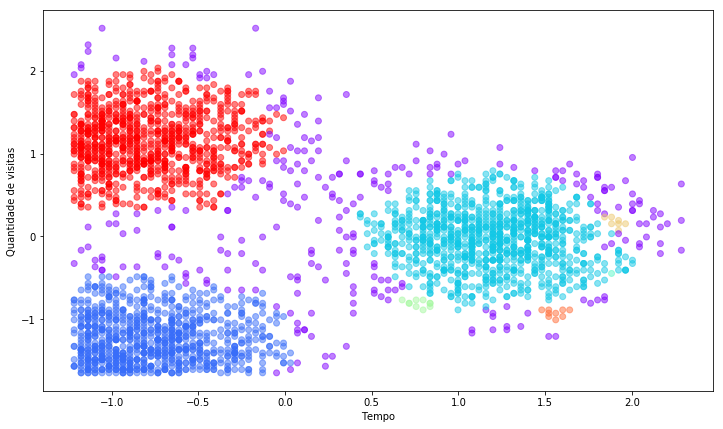

In [27]:
# plota os clusters encontrados
plt.scatter(df.visitas, df.tempo, c=clusters, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

### Vantagens do DBSCAN
- Não é necessário especificar um número inicial de clusters
- Lida bem com outliers
- Consegue encontrar clusters com formatos diferentes

### Desvantagens do DBSCAN
- A escolha dos dois parâmetros iniciais pode não ser muito intuitiva
- Tem dificuldade para encontrar clusters se a densidade dos dados variar muito

### Outros métodos de clustering

**Por partição**
- K-medians
- [K-modes](https://github.com/nicodv/kmodes)
- K-prototypes

**Por densidade/ hierárquico**
- [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html) 

**Por distribuição**
- Gaussian Mixture Models (GMMs)

**Redes neurais**
- Self Organizing Map (SOM)

O [sklearn](https://scikit-learn.org/stable/modules/clustering.html) conta com mais alguns algoritmos de clustering e também tem uma comparação entre eles para vários conjuntos de dados:

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

### ÚLTIMA PERGUNTA!

![](https://media.giphy.com/media/xT0xeuOy2Fcl9vDGiA/giphy.gif)

### Depois de ver todos esses algoritmos, quais aplicações poderíamos ter com eles?

- Segmentação de clientes
- Detecção de anomalias e fraudes
- Segmentação de imagens
- Sistemas de recomendação
- Segmentação de documentos 
- Análise de redes sociais

### Para treinar

- O repositório do [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) contém alguns datasets para realizar clustering
- Também pode-se retirar a classe de datasets existentes para problemas supervisionados e aplicar técnicas de aprendizado não supervisionado! 